In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [62]:
df = pd.read_csv(r'C:\Users\sachi\Desktop\fuelconsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [74]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(200)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
195,6.2,8,12.0,276
196,6.2,8,11.2,258
197,1.4,4,7.8,179
198,1.4,4,7.8,179


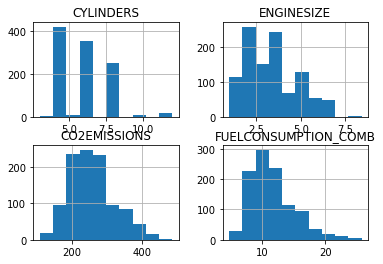

In [75]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

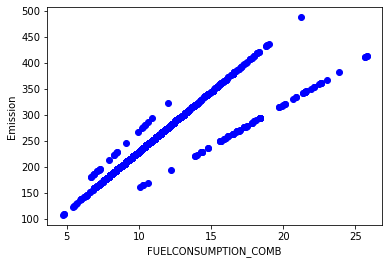

In [76]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

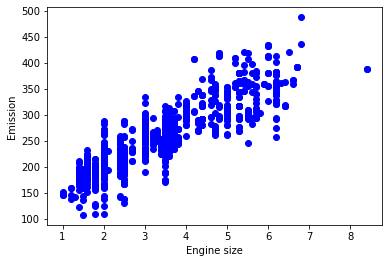

In [77]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [78]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

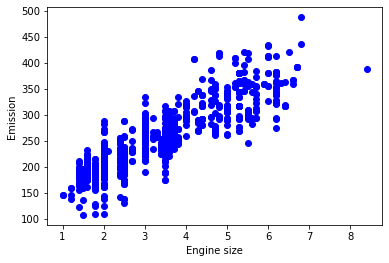

In [79]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [81]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.10894918]]
Intercept:  [125.52529533]


Text(0, 0.5, 'Emission')

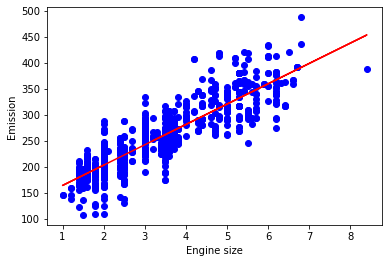

In [82]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [86]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)
print(test_y_)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

[[219.38677335]
 [262.40661744]
 [309.33735646]
 [203.74319368]
 [242.85214286]
 [203.74319368]
 [289.78288187]
 [281.96109203]
 [281.96109203]
 [360.17899038]
 [203.74319368]
 [203.74319368]
 [242.85214286]
 [203.74319368]
 [203.74319368]
 [242.85214286]
 [242.85214286]
 [203.74319368]
 [297.6046717 ]
 [297.6046717 ]
 [297.6046717 ]
 [297.6046717 ]
 [203.74319368]
 [203.74319368]
 [266.31751236]
 [203.74319368]
 [219.38677335]
 [266.31751236]
 [203.74319368]
 [266.31751236]
 [242.85214286]
 [368.00078022]
 [266.31751236]
 [266.31751236]
 [266.31751236]
 [368.00078022]
 [180.27782417]
 [266.31751236]
 [219.38677335]
 [266.31751236]
 [203.74319368]
 [219.38677335]
 [293.69377678]
 [332.80272596]
 [368.00078022]
 [180.27782417]
 [195.92140384]
 [180.27782417]
 [180.27782417]
 [332.80272596]
 [266.31751236]
 [266.31751236]
 [266.31751236]
 [348.44630563]
 [348.44630563]
 [203.74319368]
 [219.38677335]
 [180.27782417]
 [266.31751236]
 [266.31751236]
 [266.31751236]
 [266.31751236]
 [180.27